<a href="https://colab.research.google.com/github/YilangHe/prims_algo_animation/blob/main/Prims_algorithm_animation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install matplotlib

!pip install pillow


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


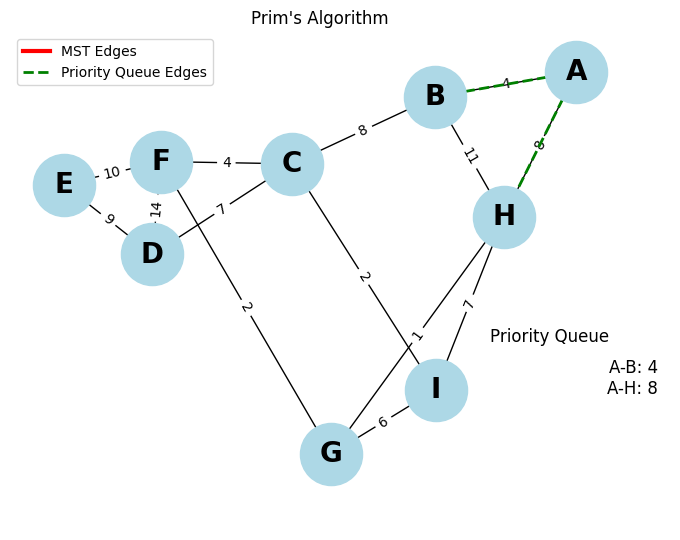

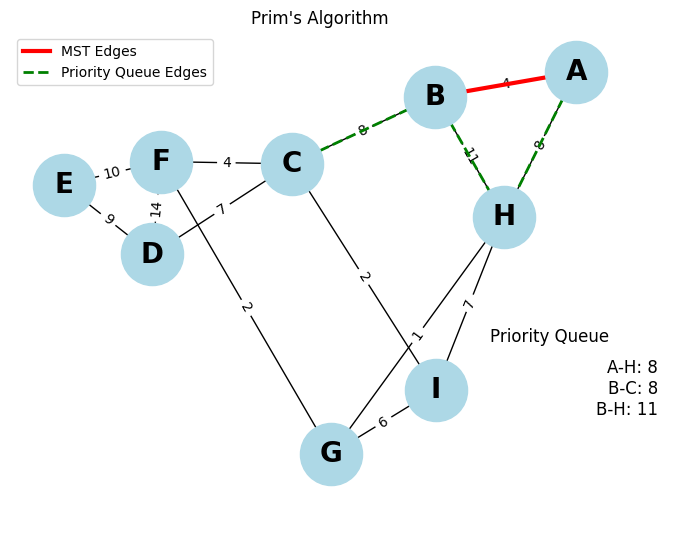

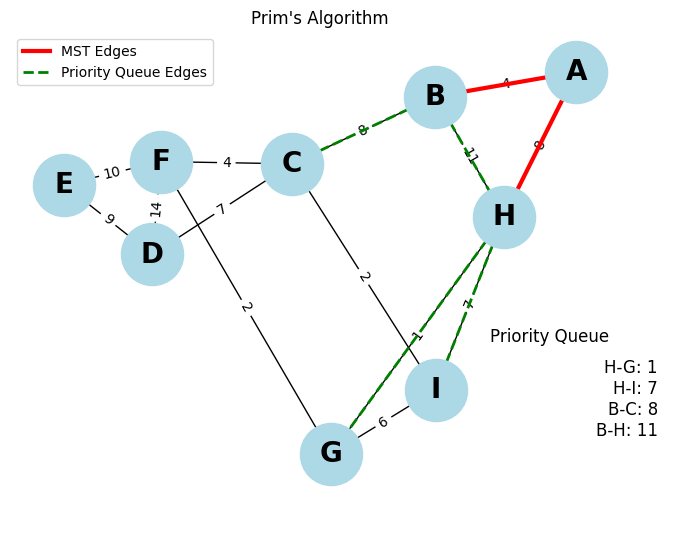

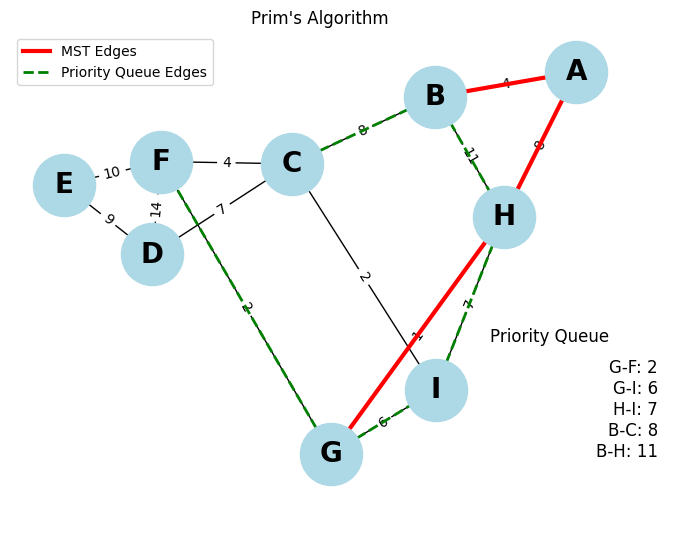

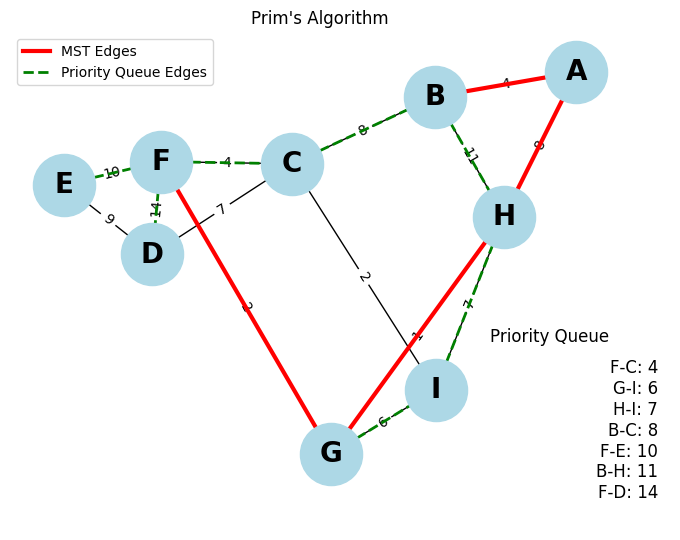

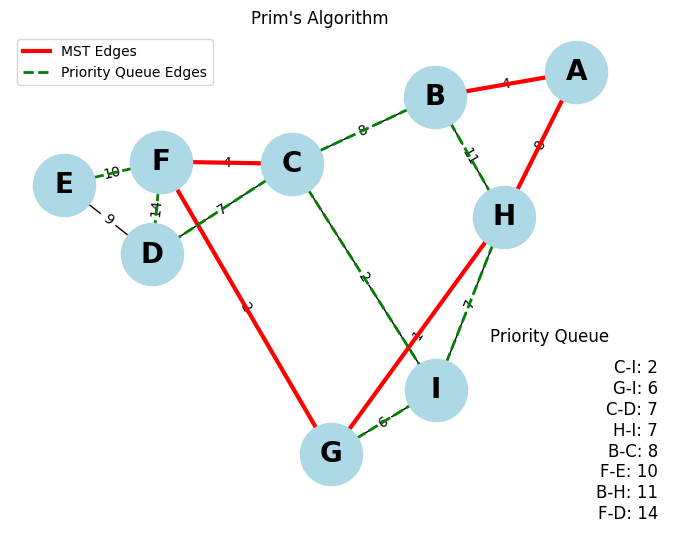

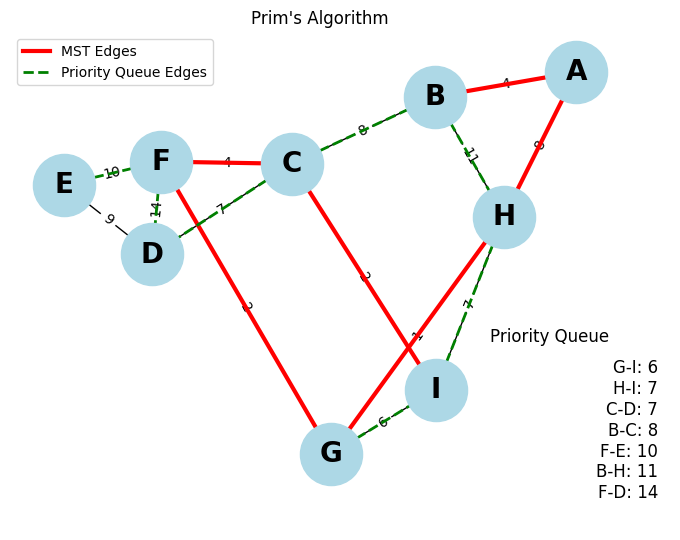

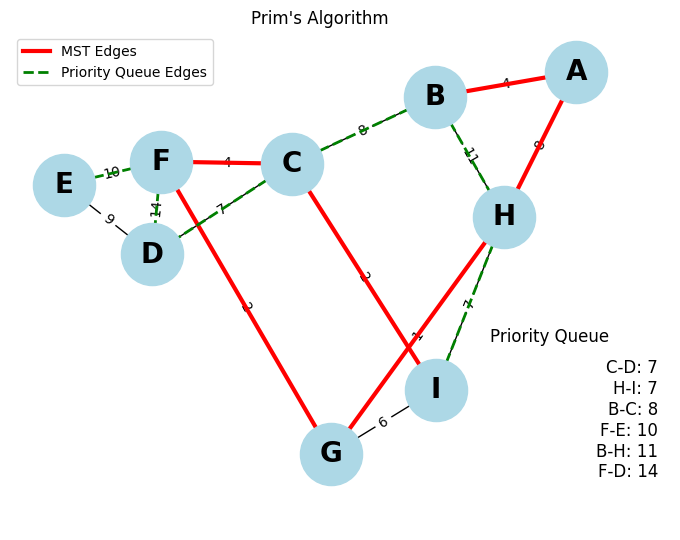

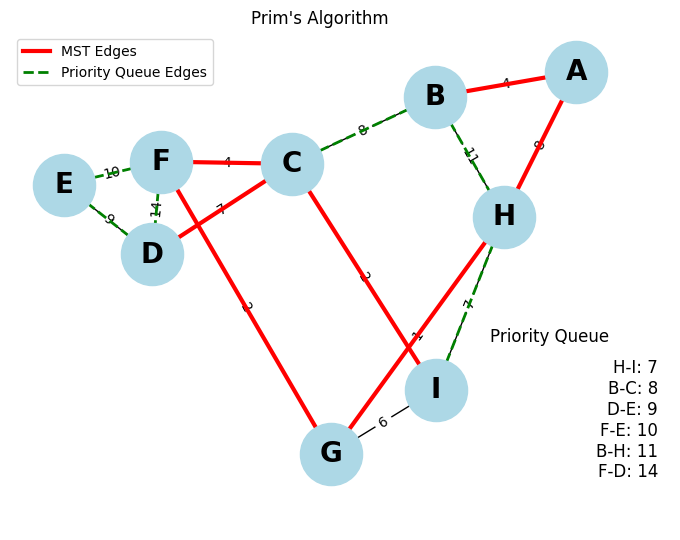

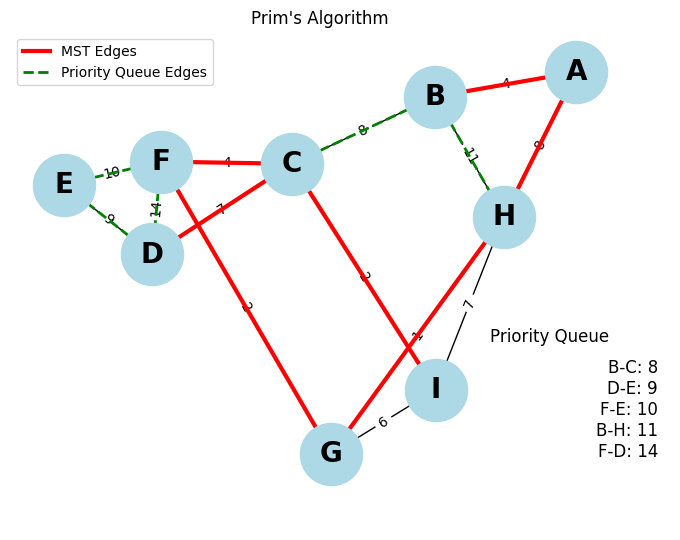

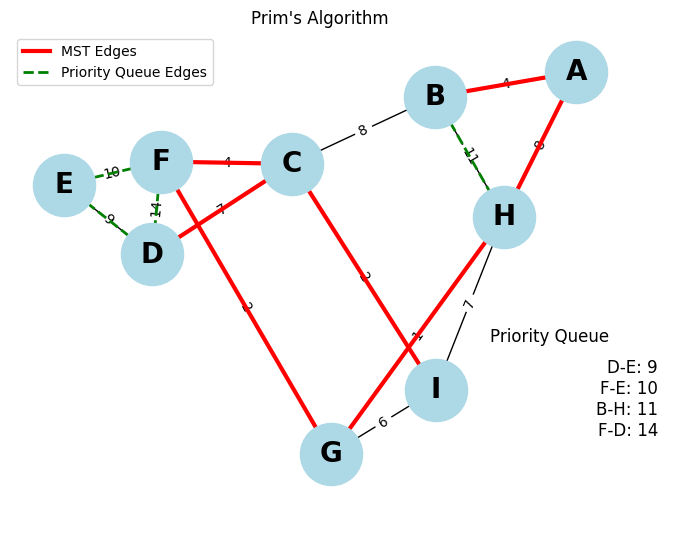

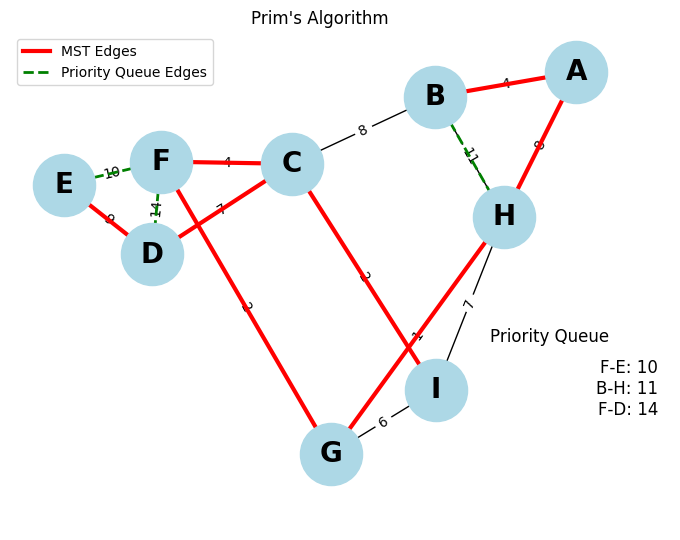

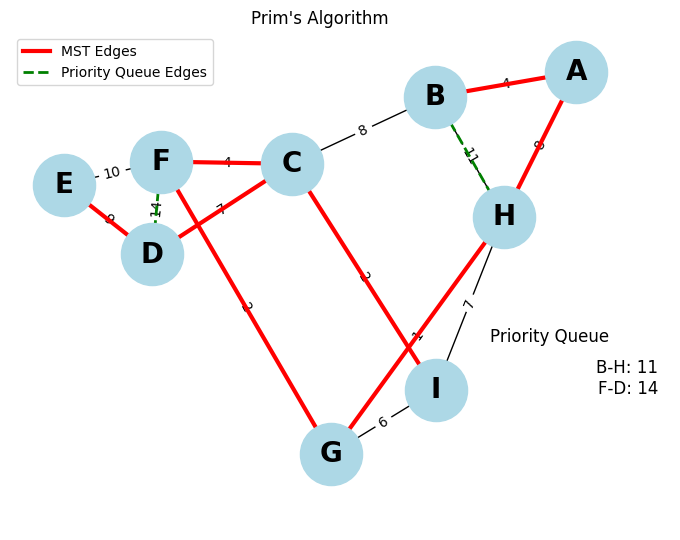

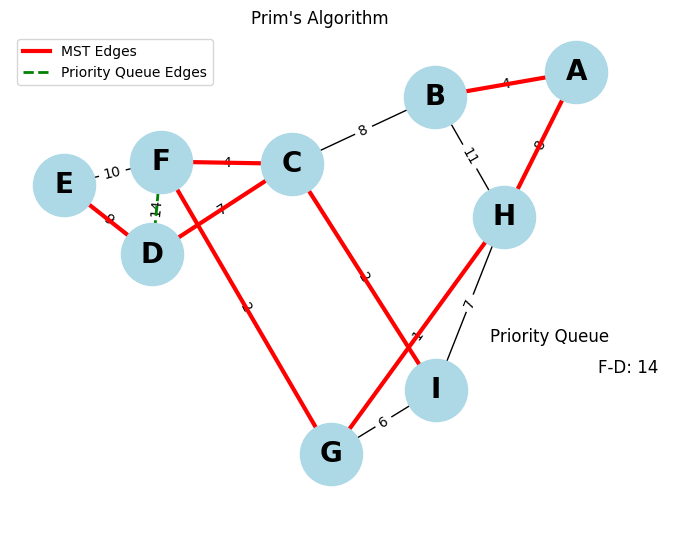

In [22]:
import heapq
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
import numpy as np



# Sample graph as an adjacency list
graph = {
    'A': {'B': 4, 'H': 8},
    'B': {'A': 4, 'C': 8, 'H': 11},
    'C': {'B': 8, 'D': 7, 'F': 4, 'I': 2},
    'D': {'C': 7, 'E': 9, 'F': 14},
    'E': {'D': 9, 'F': 10},
    'F': {'C': 4, 'D': 14, 'E': 10, 'G': 2},
    'G': {'F': 2, 'H': 1, 'I': 6},
    'H': {'A': 8, 'B': 11, 'G': 1, 'I': 7},
    'I': {'C': 2, 'G': 6, 'H': 7},
}

from matplotlib.lines import Line2D

def visualize_graph(graph, mst_edges, title, pq_edges=[]):
    G = nx.Graph()
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)

    pos = nx.spring_layout(G, seed=42)
    fig, ax = plt.subplots(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=20, font_weight='bold', ax=ax)
    nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)}, ax=ax)

    # Highlight MST edges in red
    nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=3, ax=ax)
    
    # Highlight priority queue edges in green
    nx.draw_networkx_edges(G, pos, edgelist=pq_edges, edge_color='green', width=2, style='dashed', ax=ax)

    # Create a custom legend
    custom_lines = [Line2D([0], [0], color='red', lw=3),
                    Line2D([0], [0], color='green', lw=2, linestyle='--')]
    ax.legend(custom_lines, ['MST Edges', 'Priority Queue Edges'], loc='upper left')

    ax.set_title(title)
    # Create a priority queue box
    ax_pq = plt.axes([0.65, 0.05, 0.3, 0.3], frameon=True)
    ax_pq.set_title('Priority Queue', fontsize=12)
    ax_pq.axis('off')

    return fig, ax, ax_pq


def prims_algorithm(graph, start):
    mst = []
    visited = {start}
    pq_edges = []
    frames = []
    pq_frames = []

    for neighbor, weight in graph[start].items():
        heapq.heappush(pq_edges, (weight, start, neighbor))

    while pq_edges:
        fig, ax, ax_pq = visualize_graph(graph, mst, "Prim's Algorithm", [(node1, node2) for _, node1, node2 in pq_edges])
        
        # Visualize the priority queue
        visualize_priority_queue(pq_edges, ax_pq)

        frames.append((fig, ax))
        pq_frames.append(list(pq_edges))
        weight, node1, node2 = heapq.heappop(pq_edges)
        if node2 not in visited:
            visited.add(node2)
            mst.append((node1, node2))

            for neighbor, weight in graph[node2].items():
                if neighbor not in visited:
                    heapq.heappush(pq_edges, (weight, node2, neighbor))

    return mst, frames, pq_frames

def visualize_priority_queue(pq_edges, ax):
    sorted_pq = sorted(pq_edges, key=lambda x: x[0])
    pq_text = "\n".join([f"{node1}-{node2}: {weight}" for weight, node1, node2 in sorted_pq])
    ax.text(0.95, 0.95, pq_text, fontsize=12, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)


from PIL import Image

def animate(frames, pq_frames, filename, fps=1, file_format='gif', duration=2000):
    images = []
    for (fig, _), pq_edges in zip(frames, pq_frames):
        fig.canvas.draw()
        img_arr = np.array(fig.canvas.renderer.buffer_rgba())
        img = Image.fromarray(img_arr)
        images.append(img)
    
    if file_format == 'gif':
        images[0].save(filename, save_all=True, append_images=images[1:], duration=duration, loop=0)
    else:
        raise NotImplementedError("MP4 format is not supported in this example")





mst_edges, frames, pq_frames = prims_algorithm(graph, 'A')
animate(frames, pq_frames, 'prims_algorithm.gif', duration=2000)

